<a href="https://colab.research.google.com/github/shinchangyoung/machine-learning/blob/main/%EC%82%B0%EC%A0%90%EB%8F%84_%EA%B7%B8%EB%9E%98%ED%94%84%ED%99%95%EC%9D%B8%ED%9B%84_%EC%9D%B4%EC%83%81%EC%B9%98_%EC%82%AD%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import math
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/역_버스정류장_위치_정보.csv', encoding='cp949')

In [34]:
latitudes = data['위도'].to_numpy()
longitudes = data['경도'].to_numpy()
coords = np.vstack((latitudes, longitudes)).T

mean_lat = latitudes.mean()
lat_km = coords[:, 0]
lon_km = coords[:, 1]  #* np.cos(np.radians(mean_lat))
coords_km = np.vstack((lat_km, lon_km)).T
coords_km=pd.DataFrame(coords_km) # coords_km= 좌표를 km로 변환한 데이터
#coords_km.to_csv('좌표데이터_최종.csv')

# 원본 데이터 확인

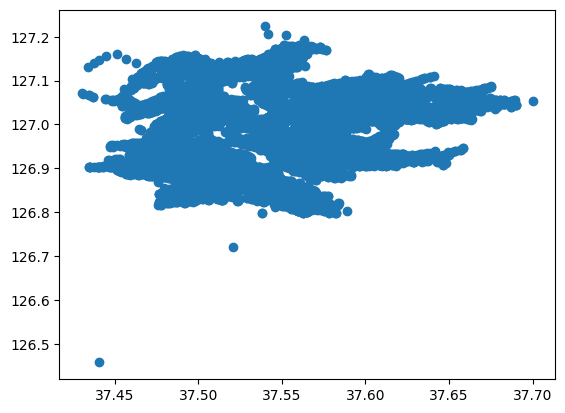

In [35]:
plt.scatter(x=coords_km[0],y=coords_km[1])

# 이상치 제거1

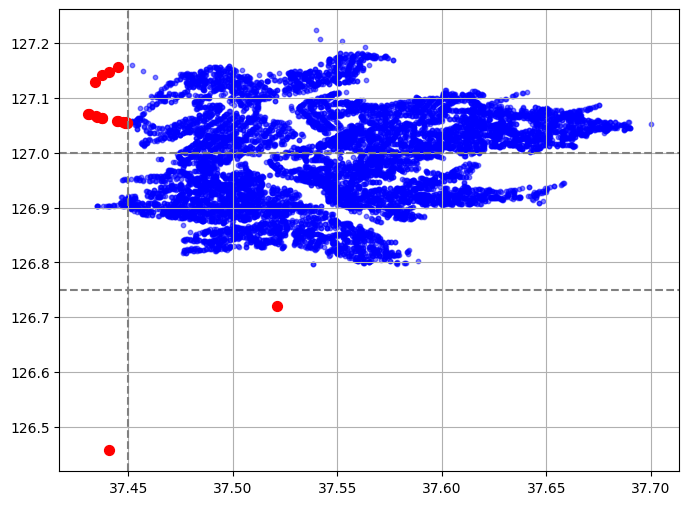

이상치 위도, 경도 값:
              0           1
3301  37.440965  126.457230
8262  37.520861  126.721031

이상치 (조건2: 경도 < 37.45 & 위도 > 127.0):
               0           1
9404   37.444453  127.057701
9405   37.444895  127.057669
9406   37.437321  127.063239
9407   37.437154  127.063704
9408   37.434513  127.066179
9409   37.434796  127.066052
9410   37.430947  127.070438
9426   37.430520  127.070846
9461   37.448451  127.054446
9462   37.449476  127.053684
9463   37.447572  127.055573
9608   37.448957  127.055303
9614   37.449131  127.055012
11557  37.445057  127.156735
11558  37.440952  127.147590
11559  37.437575  127.140936
11560  37.433888  127.129921


In [36]:
# Y값(위도_km)이 14070보다 작은 점 찾기
outliers = coords_km[coords_km[1] < 126.75]

outliers_2 = coords_km[(coords_km[0] < 37.45) & (coords_km[1] > 127.0)]


# 전체 산점도
plt.figure(figsize=(8,6))
plt.scatter(coords_km[0], coords_km[1], s=10, c='blue', alpha=0.5, label='정상 데이터')

# 이상치 빨간색 표시 (위도 < 126.75)
plt.scatter(outliers.iloc[:, 0], outliers.iloc[:, 1], s=50, c='red')

plt.scatter(outliers_2.iloc[:, 0], outliers_2.iloc[:, 1], s=50, c='red')


# 기준선 추가
plt.axhline(y=126.75, color='gray', linestyle='--')  # 수평선
plt.axvline(x=37.45, color='gray', linestyle='--')   # 수직선
plt.axhline(y=127.0, color='gray', linestyle='--')   # 수평선


plt.grid(True)
plt.show()

# 위도 < 14070인 이상치 데이터
outliers = coords_km[coords_km[1] < 126.75]

# 이상치 위도, 경도 값 출력
print("이상치 위도, 경도 값:")
print(outliers[[0, 1]])

print("\n이상치 (조건2: 경도 < 37.45 & 위도 > 127.0):")
print(outliers_2[[0, 1]])


# 이상치 제거2

In [54]:
# coords_km 이상치 인덱스만 추출
outlier_indices = outliers.index.tolist()
outlier_indices_2 = outliers_2.index.tolist()

# 두 조건 이상치 인덱스 합치기
all_outlier_indices = list(set(outlier_indices + outlier_indices_2))

# data와 coords_km가 같은 인덱스를 공유한다고 가정
data_cleaned = data.drop(index=all_outlier_indices)

coords_km_cleaned = coords_km.drop(index=all_outlier_indices)


print(f"원본 데이터 크기: {len(data)}")
print(f"이상치 삭제 후 크기: {len(data_cleaned)}")


원본 데이터 크기: 11561
이상치 삭제 후 크기: 11542


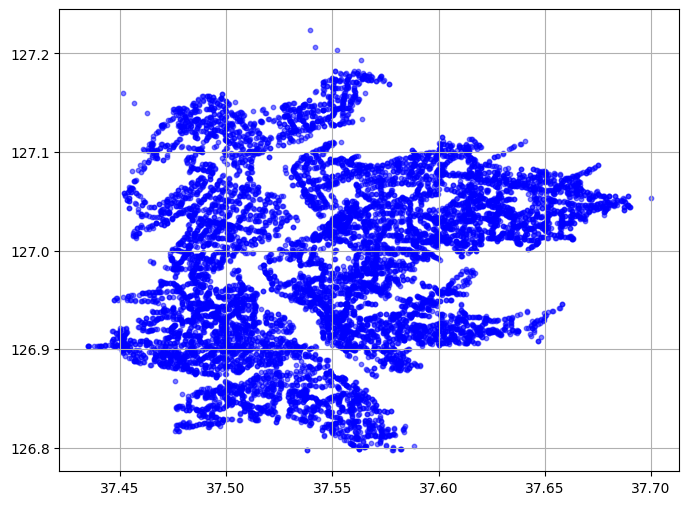

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(coords_km_cleaned[0], coords_km_cleaned[1], s=10, c='blue', alpha=0.5)
plt.grid(True)
plt.show()


In [61]:
#이상치 2 제거후 데이터셋
data_cleaned

,이름,위도,경도,type
0,종로2가사거리,37.569806,126.987752,bus
1,창경궁.서울대학교병원,37.579433,126.996521,bus
2,명륜3가.성대입구,37.582580,126.998251,bus
3,종로2가.삼일교,37.568579,126.987613,bus
4,혜화동로터리.여운형활동터,37.586243,127.001744,bus
...,...,...,...,...
11552,장지,37.478609,127.126229,subway
11553,복정,37.471016,127.126746,subway
11554,남위례,37.462839,127.139047,subway
11555,산성,37.456886,127.149927,subway
